1 torch.Size([8, 12])
2 torch.Size([120, 8])
5 torch.Size([8, 120])
8 torch.Size([8, 8])
9 torch.Size([8, 8])
12 torch.Size([120, 8])
15 torch.Size([8, 120])
18 torch.Size([12, 8])


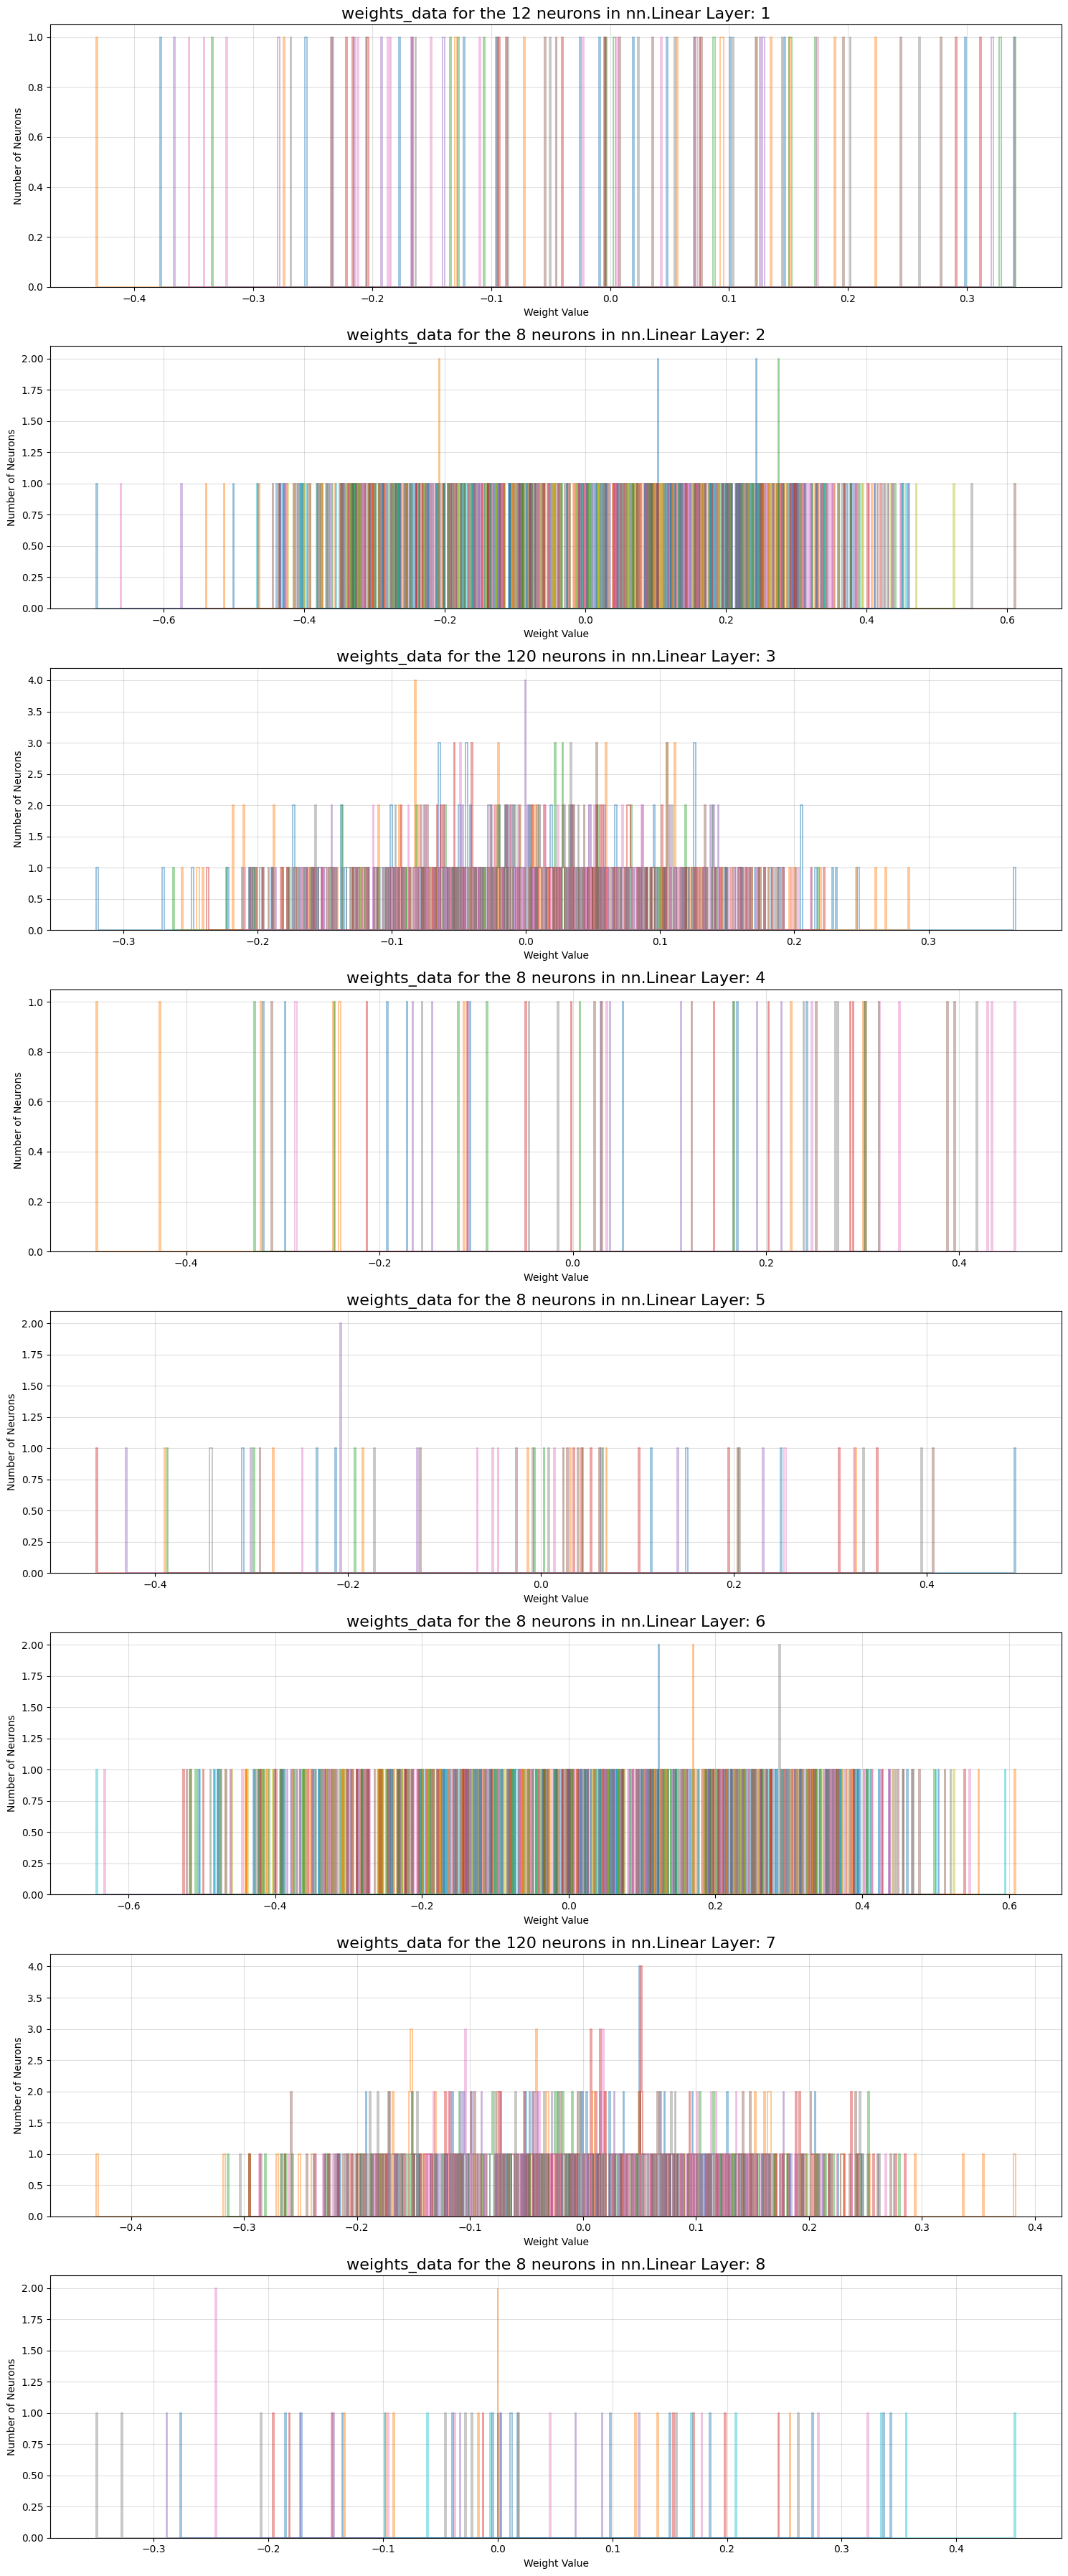

1 torch.Size([8])
2 torch.Size([120])
5 torch.Size([8])
8 torch.Size([8])
9 torch.Size([8])
12 torch.Size([120])
15 torch.Size([8])
18 torch.Size([12])


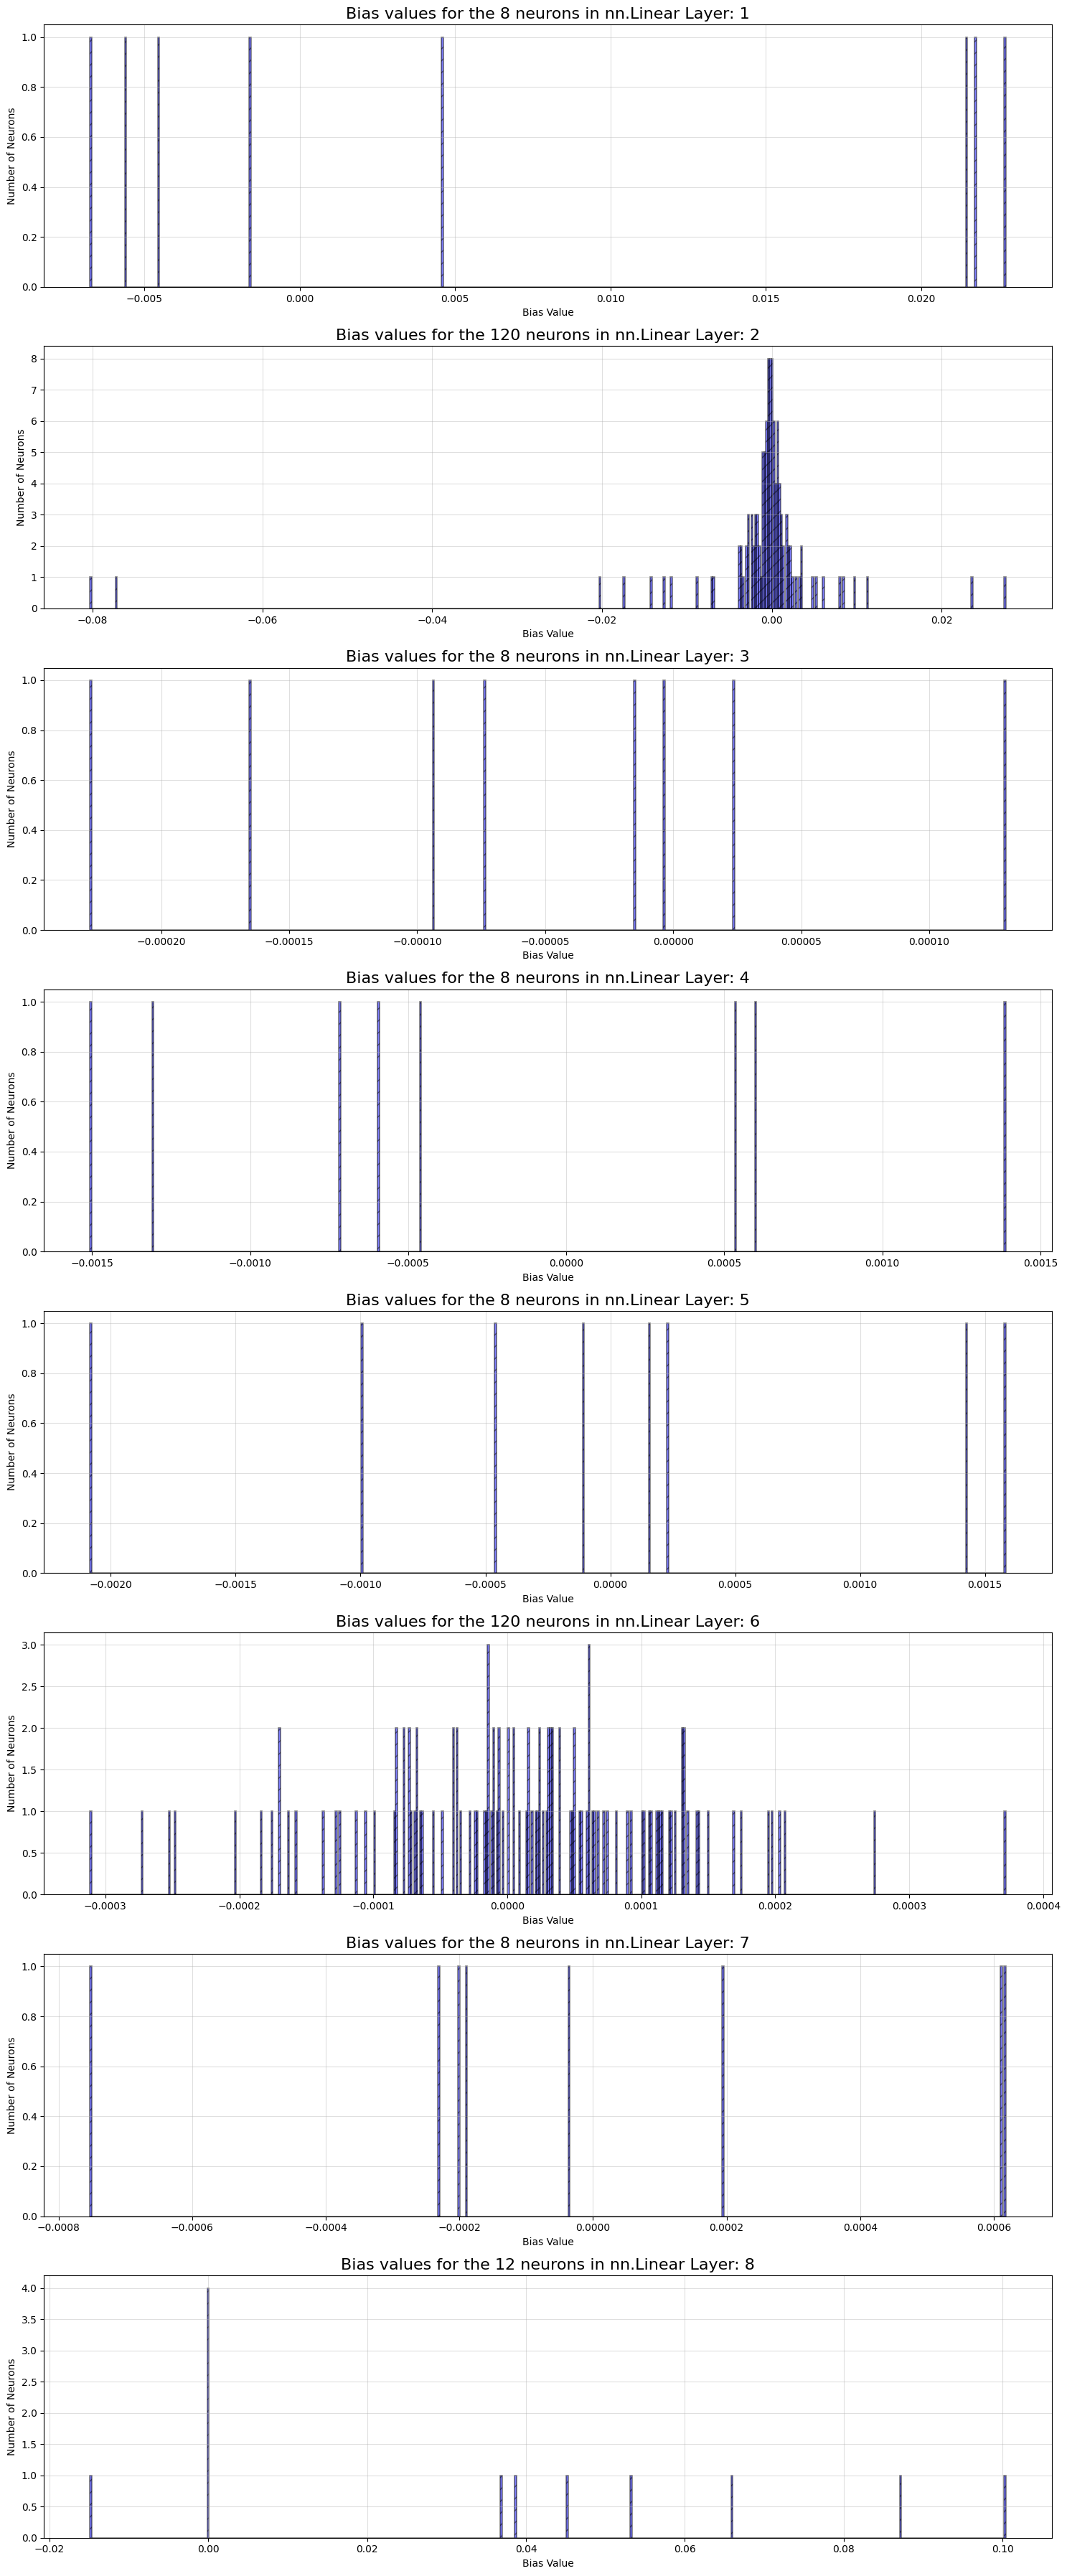

1 torch.Size([328, 8])
2 torch.Size([328, 120])
5 torch.Size([328, 8])
8 torch.Size([328, 8])
9 torch.Size([328, 8])
12 torch.Size([328, 120])
15 torch.Size([328, 8])
18 torch.Size([328, 12])


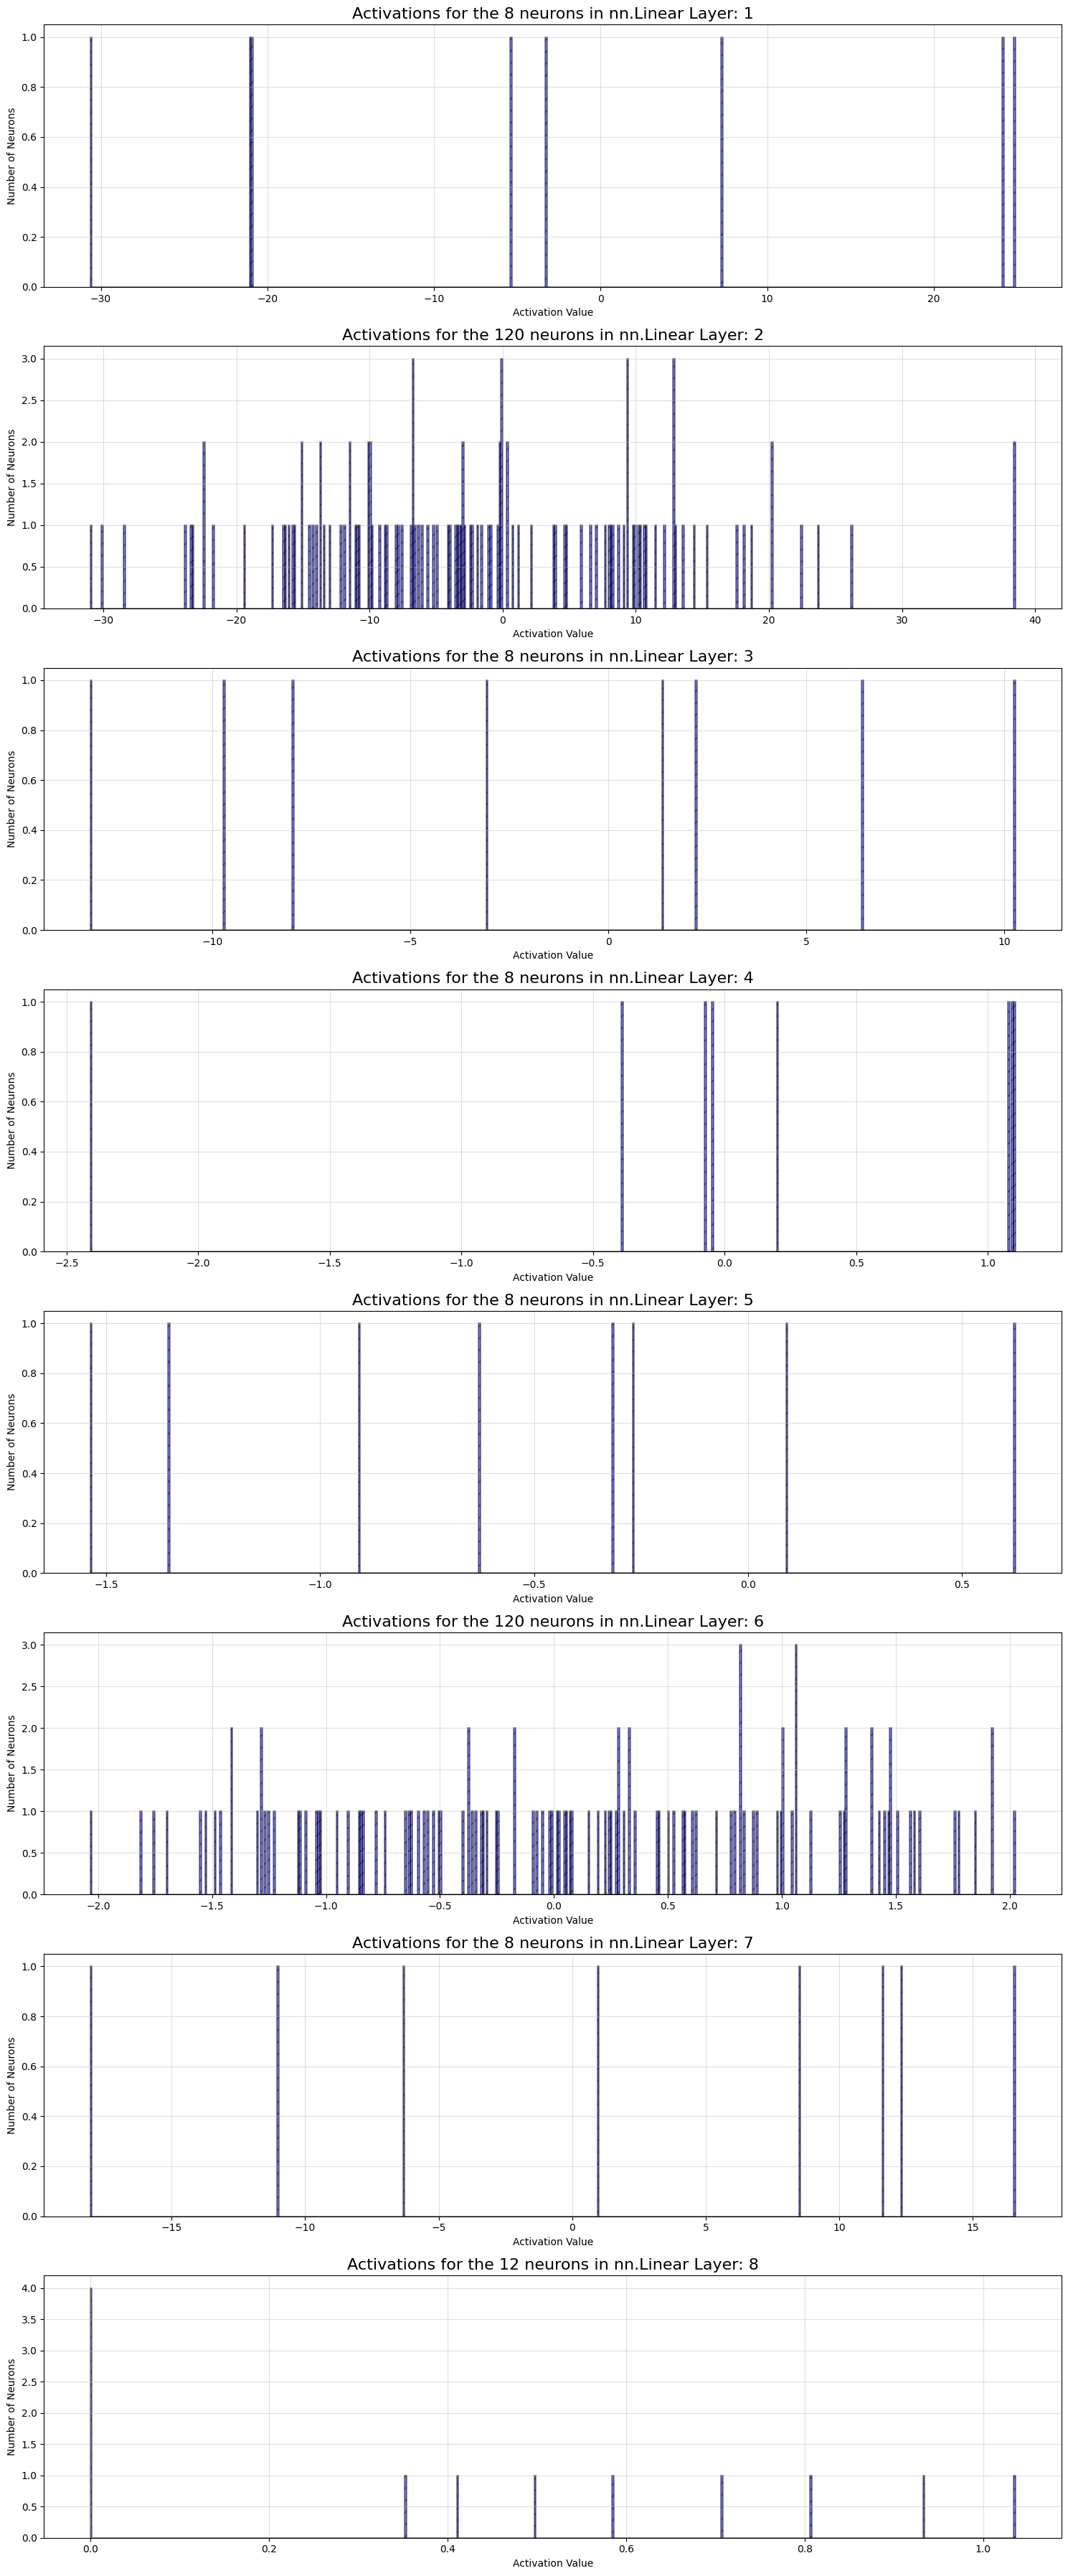

In [5]:
import torch
import os
import matplotlib.pyplot as plt

#%% - Functions
# Weights
def load_weights_data_from_file(epoch, output_dir):
    # Load the weights_data from the file named 'weights_data_epoch_{epoch}.pt'
    weights_data_path = os.path.join(output_dir, f'weights_epoch_{epoch}.pt')
    return torch.load(weights_data_path)

def plot_weights_data_histograms(weights_data, file_number, bins=100):
    # Check how many keys there are in the dictionary
    num_layers = len(weights_data.keys())

    # Plot each feature in a separate subplot
    fig, axs = plt.subplots(num_layers, 1, figsize=(15, 36))

    # Plot the weights_data for each linear layer
    layer_index = 0 
    for layer_number, weight_data in weights_data.items():
        # Assuming the weight_data is a tensor of shape (batch_size, num_features)        
        axs[layer_index].set_title(f"weights_data for the {weight_data.shape[1]} neurons in nn.Linear Layer: {layer_index+1}", fontsize=16)
        for neuron_number in range(weight_data.shape[0]):
            axs[layer_index].hist(weight_data[neuron_number, :].numpy(), bins=bins, alpha=0.5, label=f'Neuron: {neuron_number}', linewidth=1.2, fill=False, histtype='step')
        axs[layer_index].set_xlabel("Weight Value")
        axs[layer_index].set_ylabel("Number of Neurons")
        axs[layer_index].grid(alpha=0.4)

        layer_index += 1   
    plt.tight_layout()
    #plt.savefig(output_dir + '\weight Histograms\weight Histograms for File ' + str(file_number) + '.png')
    plt.show()

# Biases
def load_biases_data_from_file(epoch, output_dir):
    # Load the biases_data from the file named 'biases_data_epoch_{epoch}.pt'
    biases_data_path = os.path.join(output_dir, f'biases_epoch_{epoch}.pt')
    return torch.load(biases_data_path)

def plot_bias_histograms(biases_data, file_number, bins=100):
    # Check how many keys there are in the dictionary
    num_layers = len(biases_data.keys())

    # Plot each feature in a separate subplot
    fig, axs = plt.subplots(num_layers, 1, figsize=(15, 36))

    # Plot the biases_data for each linear layer
    layer_index = 0 
    for layer_number, bias_data in biases_data.items():
        # Assuming the bias_data is a tensor of shape (batch_size, num_features)        
        axs[layer_index].set_title(f"Bias values for the {len(bias_data)} neurons in nn.Linear Layer: {layer_index+1}", fontsize=16)
        axs[layer_index].hist(bias_data.numpy(), bins=bins, alpha=0.5, color='blue', edgecolor='black', linewidth=1.2,  hatch='//', fill=True)
        axs[layer_index].set_xlabel("Bias Value")
        axs[layer_index].set_ylabel("Number of Neurons")
        axs[layer_index].grid(alpha=0.4)

        layer_index += 1   
    plt.tight_layout()
    #plt.savefig(output_dir + '\bias Histograms\bias Histograms for File ' + str(file_number) + '.png')
    plt.show()

# Activation Data
def load_activations_from_file(epoch, output_dir):
    # Load the activations from the file named 'activations_epoch_{epoch}.pt'
    activations_path = os.path.join(output_dir, f'activations_epoch_{epoch}.pt')
    return torch.load(activations_path)

def plot_activations_histograms(activations, file_number, bins=100):
    # Check how many keys there are in the dictionary
    num_layers = len(activations.keys())

    # Plot each feature in a separate subplot
    fig, axs = plt.subplots(num_layers, 1, figsize=(15, 36))

    # Plot the activations for each linear layer
    layer_index = 0 
    for layer_number, activation_data in activations.items():
        # Assuming the activation_data is a tensor of shape (batch_size, num_features)        
        axs[layer_index].set_title(f"Activations for the {activation_data.shape[1]} neurons in nn.Linear Layer: {layer_index+1}", fontsize=16)
        axs[layer_index].hist(activation_data[file_number, :].numpy(), bins=bins, alpha=0.5, color='blue', edgecolor='black', linewidth=1.2,  hatch='//', fill=True)
        axs[layer_index].set_xlabel("Activation Value")
        axs[layer_index].set_ylabel("Number of Neurons")
        axs[layer_index].grid(alpha=0.4)

        layer_index += 1   
    plt.tight_layout()
    #plt.savefig(output_dir + '\Activation Histograms\Activation Histograms for File ' + str(file_number) + '.png')
    plt.show()



#%% - User Settings
output_dir = r'A:\Users\Ada\GitHub\Multiplane_Particle_Detector_AI_Resolution_Boost\Results\Test 170 - Training Results\\'
epoch_num = 3
num_epochs = 1
file_number = 0
bins = 500


#%% - Compute and Plot
weights_dir = output_dir + 'Weights Data\\'
bias_dir = output_dir + 'Biases Data\\'
activations_dir = output_dir + 'Activation Data\\'

for epoch in range(epoch_num, epoch_num+num_epochs):
    weights_data = load_weights_data_from_file(epoch, weights_dir)
    #iterate through all the keys in dictionary and print the shape of the tensor
    for layer in weights_data.keys():
        print(layer, weights_data[layer].shape)
    
    plot_weights_data_histograms(weights_data, file_number, bins)

    biases_data = load_biases_data_from_file(epoch, bias_dir)
    #iterate through all the keys in dictionary and print the shape of the tensor
    for layer in biases_data.keys():
        print(layer, biases_data[layer].shape)
    
    plot_bias_histograms(biases_data, file_number, bins)

    activations = load_activations_from_file(epoch, activations_dir)
    #iterate through all the keys in dictionary and print the shape of the tensor
    for layer in activations.keys():
        print(layer, activations[layer].shape)
    
    plot_activations_histograms(activations, file_number, bins)


